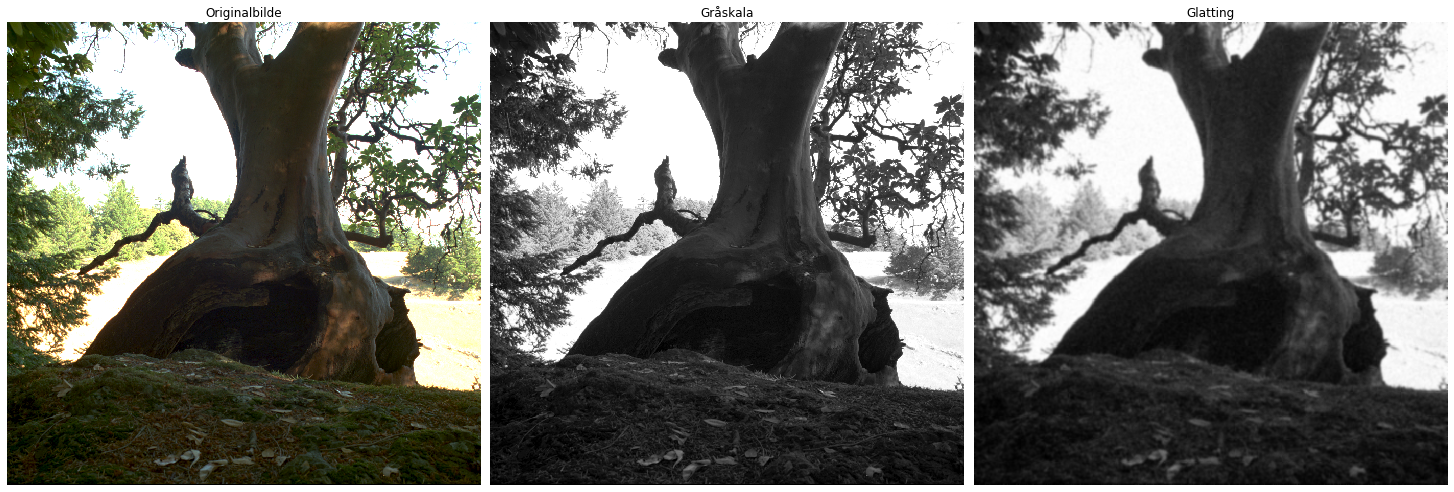

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
import eksplisitt as eks

Tree_00032   = '..\hdr-bilder\Tree\Tree_00032.png'
Balls_00032  = '..\hdr-bilder\Balls\Balls_00032.png'

def glattingBW(fil):
    orig_image = imageio.imread(fil)
    BW = np.sum(orig_image.astype(float),2)/(3*255)
    image = imageio.imread(fil)
    
    image = np.sum(image.astype(float),2)/(3*255)             #gråtone
    image = image + .05 * np.random.randn(* np.shape(image))  #legg på tilfeldig støy
    
    image[image < 0] = 0                                      #klipp til lovlige verdier
    image[image > 1] = 1
    
    los = eks.eksplisitt(image, n = 8)
    image[:, 0] = image[:, 1]      # Neumann randbetingelse
    image[:, -1] = image[:, -2]    #
    image[0, :] = image[1, :]      #
    image[-1, :] = image[-2 , :]   #
    

    plt.figure(figsize = (20, 10))
    
    plt.subplot(131)    
    plt.imshow(orig_image, plt.cm.gray)
    plt.title('Originalbilde')
    plt.axis('off')
    
    plt.subplot(132)
    plt.imshow(BW, plt.cm.gray)
    plt.title('Gråskala')
    plt.axis('off')
    
    plt.subplot(133)
    plt.imshow(image, plt.cm.gray)
    plt.title("Glatting")
    plt.axis('off')
    
    plt.subplots_adjust(wspace=0.02, hspace=0.02, top=0.9, bottom=0, left=0,right=1)

glattingBW(Tree_00032)

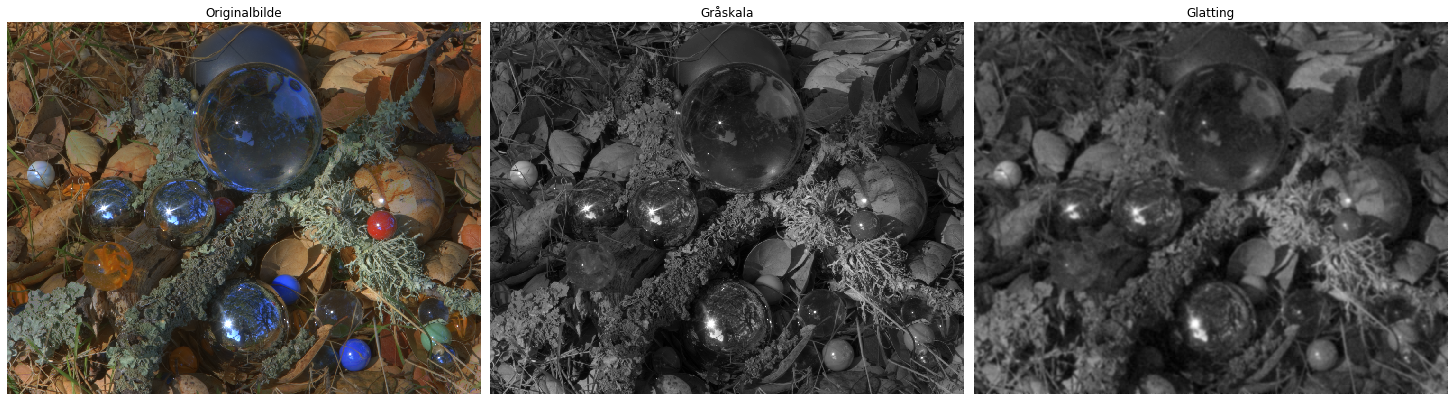

In [30]:
glattingBW(Balls_00032)